In [2]:
import os
import pandas as pd
import numpy as np
from io import StringIO
from tqdm import tqdm
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import geopandas as gpd

In [3]:
# 数据
data = pd.read_csv(r"F:\福州\Timing_4_3.csv")

In [11]:
data

,started_at,finished_at,longitude,latitude,ID,time
0,2023-04-03 00:10:56,2023-04-03 12:02:11,119.175145,25.910189,00001b94-cbad-357d-a3f7-93840bd9fd6a,0
1,2023-04-03 14:03:25,2023-04-03 23:54:38,119.175197,25.910766,00001b94-cbad-357d-a3f7-93840bd9fd6a,14
2,2023-04-03 00:47:41,2023-04-03 02:47:36,119.255977,26.109386,00002edc-5b31-42d7-913b-4c06358ef30a,0
3,2023-04-03 08:03:19,2023-04-03 11:09:08,119.257831,26.106583,00002edc-5b31-42d7-913b-4c06358ef30a,8
4,2023-04-03 12:10:59,2023-04-03 13:13:17,119.256460,26.109264,00002edc-5b31-42d7-913b-4c06358ef30a,12
...,...,...,...,...,...,...
3670090,2023-04-03 13:53:11,2023-04-03 18:55:45,119.349452,26.021215,gfkgdkl`~9h6bfbf5 bil5y7c>5;a:d02go,13
3670091,2023-04-03 00:52:39,2023-04-03 07:39:15,119.338592,26.037298,gfkna;:4~oo4cfh96 bad5y718co72a45eb,0
3670092,2023-04-03 10:54:40,2023-04-03 11:55:12,119.325868,26.045517,gfkna;:4~oo4cfh96 bad5y718co72a45eb,10
3670093,2023-04-03 14:13:49,2023-04-03 17:30:03,119.338600,26.037283,gfkna;:4~oo4cfh96 bad5y718co72a45eb,14


In [12]:
len(data['ID'].unique())

1232416

### 停留次数统计

In [4]:
#  统计用户停留点的数量
def caculate_adj_staypoint(data):
    transition_counts = (
        data.groupby(['ID'])
        .size()
        .reset_index(name='visit_count')
    )
    return transition_counts

In [5]:
transition_counts = caculate_adj_staypoint(data)
transition_counts

,ID,visit_count
0,00001b94-cbad-357d-a3f7-93840bd9fd6a,2
1,00002edc-5b31-42d7-913b-4c06358ef30a,5
2,000045bd-9334-43c9-a2af-dcf62c170d72,2
3,00006455-865a-499f-82d9-43b79b590ac3,2
4,0000727d-52ab-360e-b13b-05fb64ce7b26,5
...,...,...
1232411,gfk379=?~3ogcf49b 8ciay360>9f0236be,3
1232412,gfk3d;nd~oo43ff80 ;1o7yfcl2:67b>ecf,3
1232413,gfkae5l5~lm17fb0b 8`lgy3ci7i3g55aja,2
1232414,gfkgdkl`~9h6bfbf5 bil5y7c>5;a:d02go,2


<Axes: xlabel='visit_count'>

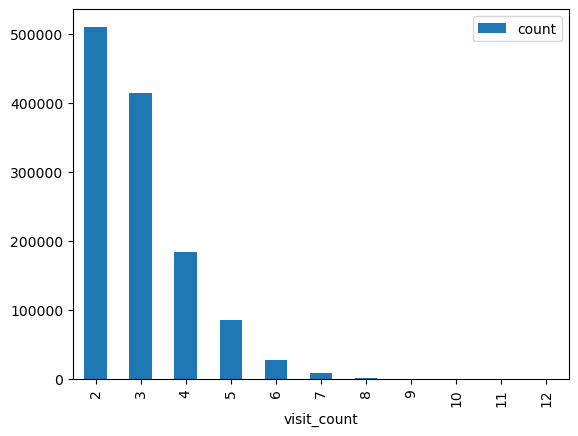

In [6]:
vist_count = (
        transition_counts.groupby(['visit_count'])
        .size()
        .reset_index(name='count')
    )
vist_count.plot(x='visit_count',y='count',kind='bar') # 停留的数量在4个以内，以2个为最多

In [7]:
vist_count

,visit_count,count
0,2,510530
1,3,414126
2,4,184205
3,5,85123
4,6,27294
5,7,9002
6,8,1827
7,9,269
8,10,34
9,11,5


In [8]:
# 平均停留次数
transition_counts['visit_count'].mean() # 平均3次

2.9779676667618724

### 停留时间统计

In [9]:
data['started_at'] = pd.to_datetime(data['started_at'], format='%Y-%m-%d %H:%M:%S')
data["time"] = data["started_at"].dt.hour

<Axes: xlabel='time'>

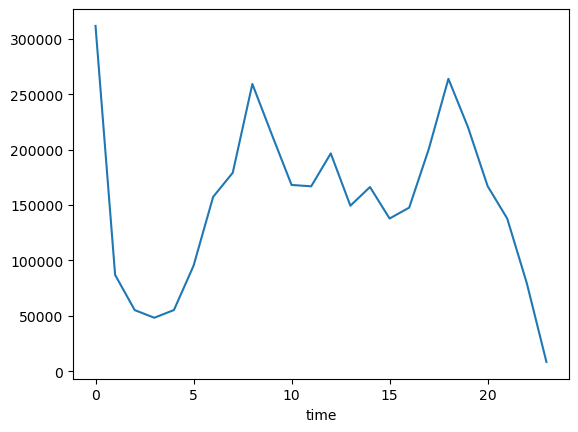

In [10]:
data.groupby('time').size().plot()